###### Imports and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rcParams
import matplotlib as mpl
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties

In [2]:
#import data
data = pd.read_csv('../../data/Geography Specific Output/GallatinFigures.csv')
data['Year'] = data['Year'].replace('None','0')
data['Year'] = data['Year'].astype(float)

# Set Style Parameters

In [7]:
#HARDCODE COLORS AND FONTS TO BE PASSED IN OTHER PARAMETERS
GNRCDARKBLUE = '#00263E'
GNRCLIGHTBLUE = '#6DB0C7'
GNRCORANGE = '#EB7525'
GNRCCOOLGRAY = '#7B7E85'
GNRCFONTONE = 'Calibri'
GNRCFONTTWO = 'DIN Condensed'
GNRCFONTTHREE = 'Palatino Linotype'
#FONT PARAMETERS
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
BIGGEST_SIZE = 20
rcParams['font.size'] = SMALL_SIZE           #controls default text sizes
rcParams['font.weight'] = 'normal'           #controls default text weight
rcParams['axes.titlesize'] = BIGGER_SIZE      #fontsize of the axes title
rcParams['axes.labelsize'] = MEDIUM_SIZE     #fontsize of the x and y labels
rcParams['xtick.labelsize'] = SMALL_SIZE     #fontsize of the xtick labels
rcParams['ytick.labelsize'] = SMALL_SIZE     #fontsize of the ytick labels
rcParams['legend.fontsize'] = SMALL_SIZE     #legend fontsize
rcParams['font.family'] = GNRCFONTONE        #although calibri is not a font "family" this defaults to the font itself
#FIGURE PARAMETERS
rcParams['figure.figsize'] = 10, 5           #figure size in inches
rcParams['figure.edgecolor'] = 'None'        #color of figure edges
rcParams['figure.autolayout'] = True         #tells matplotlib to optimize figure layout within parameters
rcParams['figure.dpi'] = 500                 #even though we save as a vector file this renders the image nicely here and for github
#AXES PARAMETERS
#Axes contain most of the figure elements
rcParams['axes.facecolor'] = 'None'          #color of axes container, none makes it transparent
rcParams['axes.grid'] = True                 #display grid
rcParams['axes.grid.which'] = 'major'        #only display major grid
rcParams['axes.axisbelow'] = True            #draw axis gridlines and ticks below patches
rcParams['text.color'] = GNRCDARKBLUE        #axes text color
rcParams['axes.labelcolor'] = GNRCDARKBLUE   #axes label color
rcParams['xtick.color'] = GNRCCOOLGRAY       #axes x tick label color
rcParams['ytick.color'] = GNRCCOOLGRAY       #axes y tick label color
rcParams['axes.labelpad'] = 15               #the padding, or distance, between the label and figure
rcParams['axes.titlepad'] = 20               #the padding, or distance, between the title and figure
#AXIS LABEL FORMATTERS
yearformat = '%.0f'                          #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
#GRID PARAMETERS
rcParams['grid.color'] = GNRCCOOLGRAY        #grid color
rcParams['grid.linestyle'] = '-'             #solid linestyle
rcParams['grid.alpha'] = '0.7'               #transparency
#LINE PLOT PARAMETERS
rcParams['lines.linewidth'] = 1.5            #line width
rcParams['lines.linestyle'] = '-'            #solid linestyle
rcParams['lines.marker'] = 'o'               #circular marker
linealpha = 0.5                              #no rcparameter for line transparency, so set here for line and called in plotting function
#ALL FIGURE COLOR CYCLER
#set colors for default where it's max 2 lines in a chart for this example
#color dictionary mapping specific geos to colors will have to be executed in the cell
rcParams['axes.prop_cycle'] = cycler(color = [GNRCORANGE, GNRCCOOLGRAY])
#TAKE AWAY BOX FOR ALL FIGURES
rcParams.update({'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False})
#TICK MARKS - you can choose to show major versus minor or no ticks in the code
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 4
rcParams['ytick.major.size'] = 6
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.size'] = 3
#TICKS
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
#LEGEND
rcParams['legend.framealpha'] = 0.8         #transparency of legend
rcParams['legend.facecolor'] = 'inherit'    #legend inherits the facecolor of the figure
rcParams['legend.frameon'] = False          #no frame for legend

## Figure Title: Comparative Population Over Time

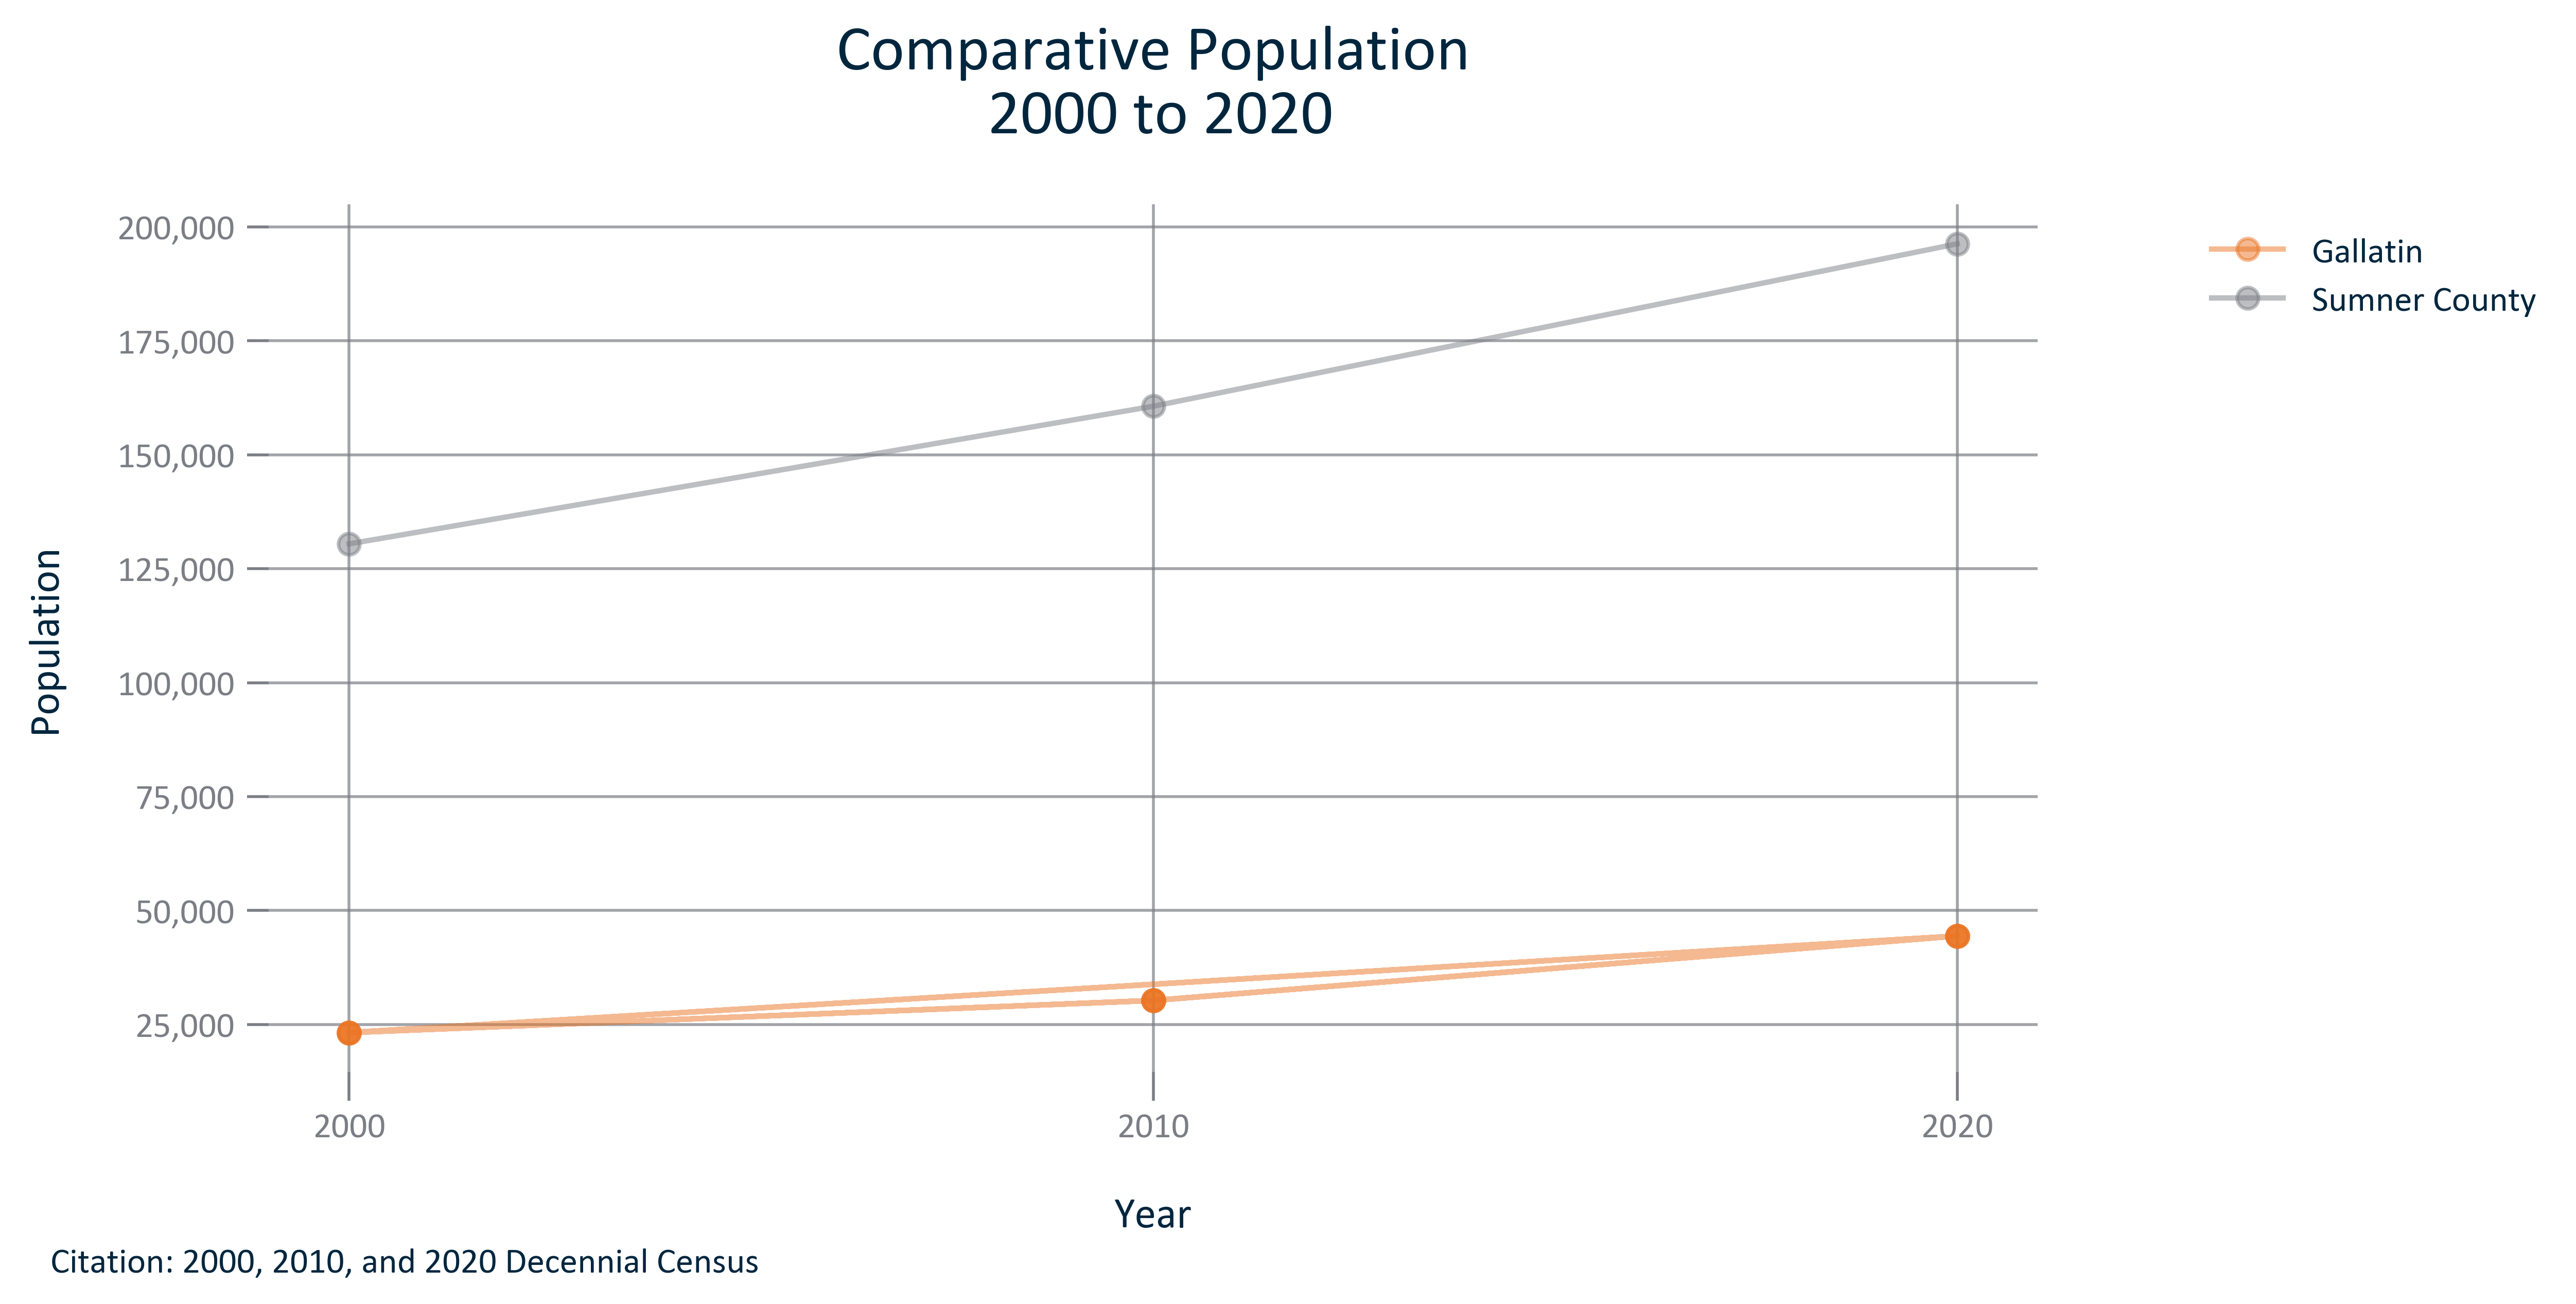

In [8]:
#figure naming inputs
title = 'Comparative Population\n 2000 to 2020' #set title of figure
citation = 'Citation: 2000, 2010, and 2020 Decennial Census' #set the citation for figure

#create temporary dataframes
df_temp1 = data.loc[data['NAME'] == 'Gallatin'] #set geo for line 1
x1input = 'Year' #set string for axis label and column input for x
y1input = 'Population' #set string for axis label and column input for y
x1 = df_temp1[x1input] #set x for line 1
y1 = df_temp1[y1input] #set y for line 1
xlabel = x1input #set x label
ylabel = y1input #set y label
linelabel1 = 'Gallatin' #hard code line label
df_temp2 = data.loc[data['NAME'] == 'Sumner County'] #set geo for line 1
x2input = 'Year' #set string for axis label and column input for x
y2input = 'Population' #set string for axis label and column input for y
x2 = df_temp2[x2input] #set x for line 2
y2 = df_temp2[y2input] #set y for line 2
xlabel = x2input #set x label
ylabel = y2input #set y label
linelabel2 = 'Sumner County'#hard code line label
xaxisformat = yearformat
yaxisformat = numbernodecimalformat

#create figure
fig, ax = plt.subplots() #initializes the figure
ax.plot(x1, y1, alpha = linealpha, label = linelabel1) #create the first "line object"
ax.plot(x2, y2, alpha = linealpha, label = linelabel2) #create the second "line object"
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(xaxisformat)) #x axis formatting
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(yaxisformat)) #y axis formatting
plt.locator_params(axis='x', nbins=3) #set so there are only three markers on the bottom for the three years

#citation label
fig.text(.3, .0009, citation, ha='right')
        
#locate legend outside of the figure - to do so you have an initial location and then use bbox_to_anchor to locate it from there
ax.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

#save as vector file and show figure, close out
fig.savefig('gallatinfigstables/comparativepopulationovertime.svg', bbox_inches='tight') #saves as vector, tight removes extra space around figure
plt.show()
plt.close();